<br>

## FUNDAMENTALS OF DATA ANALYSIS PROJECT 2020

In this notebook I am creating my project for the module Fundamentals of Data Analysis 2020. 
Please find below a description of the project( instructions for the project to be deleted before last commit), references and the code explained with markdown cells 





***
References

- [What is linear regression?](https://www.statisticshowto.com/probability-and-statistics/regression-analysis/find-a-linear-regression-equation/)

- [Multiple lines chart documentation](https://python-graph-gallery.com/122-multiple-lines-chart/)

- [Linear regression with example](https://towardsdatascience.com/linear-regression-with-example-8daf6205bd49)

- [Numpy polyfit documentation](https://numpy.org/doc/stable/reference/generated/numpy.polyfit.html)

- [Simple Linear Regression Lecturer's github](https://github.com/ianmcloughlin/jupyter-teaching-notebooks/blob/master/simple-linear-regression.ipynb)

- [Numpy corrcoef function](https://numpy.org/doc/stable/reference/generated/numpy.corrcoef.html)

- [Deep learning for beginners linear regression cost function](https://towardsdatascience.com/coding-deep-learning-for-beginners-linear-regression-part-2-cost-function-49545303d29f)

- [Non-linear regression model for wind turbine journal](https://www.vdu.lt/wp-content/uploads/2018/02/Marciukaitis-2017-Non-linear-regression-model-for-wind-turbine-power-curve.pdf)

- [Introduction to linear and polynomial regression](https://towardsdatascience.com/introduction-to-linear-regression-and-polynomial-regression-f8adc96f31cb)

- [Numpy poly1d function documenation](https://numpy.org/doc/stable/reference/generated/numpy.poly1d.html)

- [Polynomial regression w3 schools documentation](https://www.w3schools.com/python/python_ml_polynomial_regression.asp)

- [Sklearn neural network models](https://scikit-learn.org/stable/modules/neural_networks_supervised.html)

- [Solving classification and regression problems with Keras](https://stackabuse.com/tensorflow-2-0-solving-classification-and-regression-problems/)
***

<br>

### Project instructions

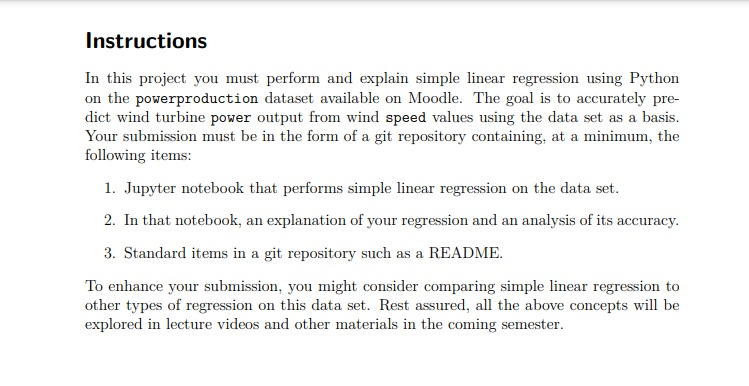

<br>

### Purpose of this project


My intention with this assignment is analyse the data from the 'powerproduction' dataset, in order to accurately predict wind turbine power output from wind speed values. 

In order to do so I will perform a simple linear regression on the dataset in this notebook, adding an explanatio of my regression and analysing its accuracy. 

To go a little bit further I will also compare this type of regression to other types of regression using this dataset. 


<br>

#### What is linear regression? 

Before we start working with this dataset, I would like to offer a brief explanation of what linear regression is and maybe add some examples in order to understand better what we expect to see when using the 'Powerproduction' dataset analysis. 

A simple definition that I found on this [source](https://www.statisticshowto.com/probability-and-statistics/regression-analysis/find-a-linear-regression-equation/) is that this kind of regression is a way to model a relationship between two sets of variables. Using the regression model, we can model the nature of the dependen variable and forecast its behaviour as the independent variable changes.
In this case, we want to be able to perform linear regression on this dataset to predict how much wind speed we need to create a specific amount of power/electricity. 

Furthermore we will algo discuss whether linear regression is the best option for this specific dataset and compare with with another type of regression ( maybe a curve regression by the looks of the dataset initially). 



### Analsysis


#### Preparing dataset

The first setp on this analysis is to load the 'powerproduction' dataset and have a look into it using descriptive statistics.
This dataset represents the relation between speed and power produced in a wind turbine. 
Let's see this information in the code cells below: 

In [1]:
#I imported necessary modules to organize data and perform descriptive statistics

import pandas as pd #imported to organize data 
import numpy as np #for array of numbers 
import matplotlib.pyplot as plt # imported for plotting

#loading dataset with pandas


data=pd.read_csv(r'C:\Users\fainl\OneDrive\Documents\GMITSEP2020\Fundamentals-Project\Powerproduction dataset.csv')  

#print(data)

#converting this dataset into dataframe with pandas 

powerdata=pd.DataFrame (data, columns = ['speed','power'])

print(powerdata)



      speed  power
0     0.000    0.0
1     0.125    0.0
2     0.150    0.0
3     0.225    0.0
4     0.275    0.0
..      ...    ...
495  24.775    0.0
496  24.850    0.0
497  24.875    0.0
498  24.950    0.0
499  25.000    0.0

[500 rows x 2 columns]


In [2]:
#initially describing dataset using pandas functionalities

powerdata.describe()

,speed,power
count,500.000000,500.000000
mean,12.590398,48.014584
std,7.224991,41.614572
min,0.000000,0.000000
25%,6.324750,5.288000
50%,12.550500,41.645500
75%,18.775250,93.537000
max,25.000000,113.556000


 <br>
 
Below we can see a summary of the data using the function describe from pandas. Mean for speed is 12.59 while power is 48.01 , std 7.22 for speed while 41.61 for power. 

Now I am going to plot this data to see the correlation between speed and power. 

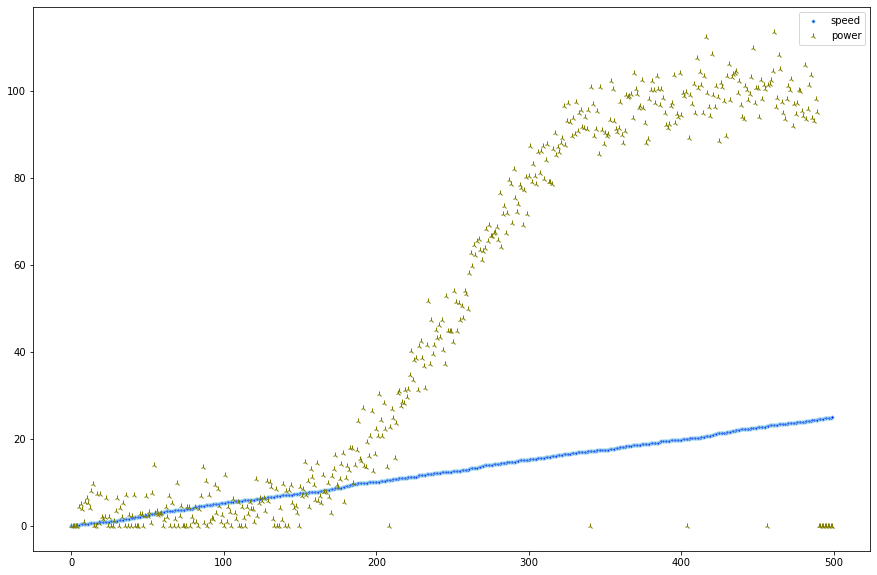

In [3]:
#Plotting dataset initially in its 'raw' form: 

# Matplotlib interactive plots

%matplotlib inline
#resizing
plt.rcParams['figure.figsize']=([15, 10])

#plotting, speed is shown blue dots while power is the green section
plt.plot( 'speed', 'y1', data=powerdata, marker='o', markerfacecolor='blue', markersize=3, color='skyblue', linewidth=4)
plt.plot( 'power', 'y2', data=powerdata, marker='2', color='olive', linewidth=4)


plt.legend()

plt.show()



Initially it seems that the power and the speed were closely related as when wind speed increases, the power being produced also increases, until the moment in which speed exceeds 20 mph and turbine is shut down. Looking at the initial shape, does not seem that this dataset is suitable for simple linear regression given its shape. However I am going to proceed to create a line of best fit for these variables and see how it behaves. 

See code cells below with explanation for the line of best fit created using numpy package as taught in our lectures. 

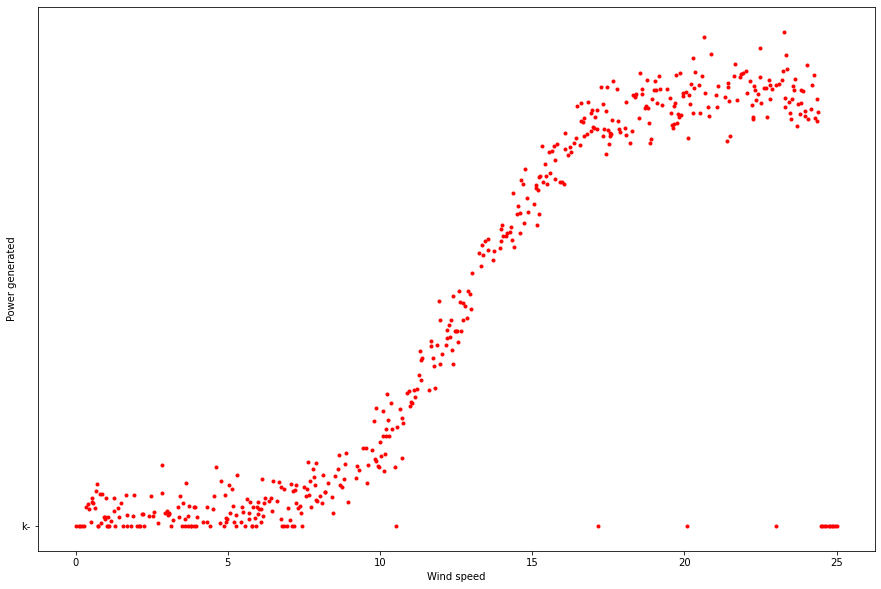

In [4]:
#following lecture's video in how to create a line of best fit I tried to fit a line between both variables using 
#numpy polyfit function

#resizing
plt.rcParams['figure.figsize']=([15, 10])

#lets consider the wind speed as the independent variable as the power
#generated by the turbines depends on it

#first I separate the 2 variables to represent them 

power=powerdata['speed']
speed=powerdata['power']

plt.plot(power,speed, 'r.','k-')

#labels 
plt.xlabel('Wind speed')
plt.ylabel('Power generated')

plt.show()

<br>

Again observing this plot , the dataset is creating a curve and seems very complicated to create a line of best fit. However I am using the regression equation 'y=a + bx' in below cells in order to try to fit the model.



<ipython-input-5-498bd1493d40>:5: MatplotlibDeprecationWarning: Case-insensitive properties were deprecated in 3.3 and support will be removed two minor releases later
  plt.plot(power,speed, 'k2', Label='data')


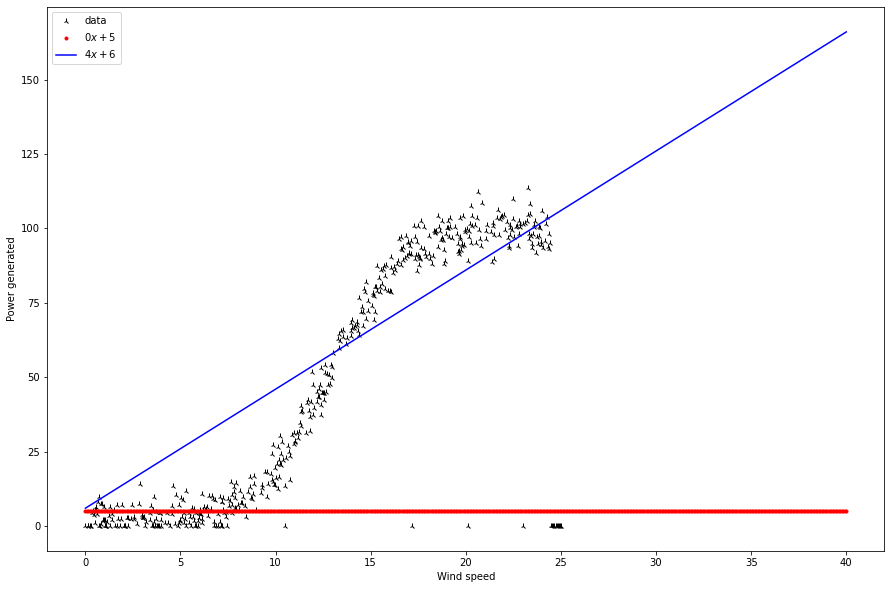

In [5]:


#now adding some lines to this plot using the regression equation
#above mentioned in addition to numpy linspace for 'x'
plt.rcParams['figure.figsize']=([15, 10])

plt.plot(power,speed, 'k2', Label='data')

# Overlay some lines on the plot.
x = np.linspace(0.0,40,500)
plt.plot(x, 0.0 *x + 5.0, 'r.', label=r"$0x+ 5$")
plt.plot(x, 4.0 * x + 6.0, 'b-', label=r"$4x + 6$")

# Add a legend.
plt.legend()

# Add axis labels.
plt.xlabel('Wind speed')
plt.ylabel('Power generated')

# Show the plot.
plt.show()

<br> 

#### Calculating the cost

Creating these 2 lines over our data we can see that the line of best fit seems not to fit the data as good as we would expect.

Next I am going to calculate the cost. The **Cost function** in linear regression refers to the function that quantifies the error between predicted values and expected values and presents it in the form of a single real number [source](https://towardsdatascience.com/coding-deep-learning-for-beginners-linear-regression-part-2-cost-function-49545303d29f).

We can perform this operation using one of numpy modules called **numpy polyfit**. What numpy polyfit does is to return a vector of coefficients p that minimises the squared error in the order deg, deg-1, … 0. 
Let's see an example with this data below:

In [6]:
#using polyfit function

np.polyfit(power, speed, 1)

array([  4.91759567, -13.89990263])

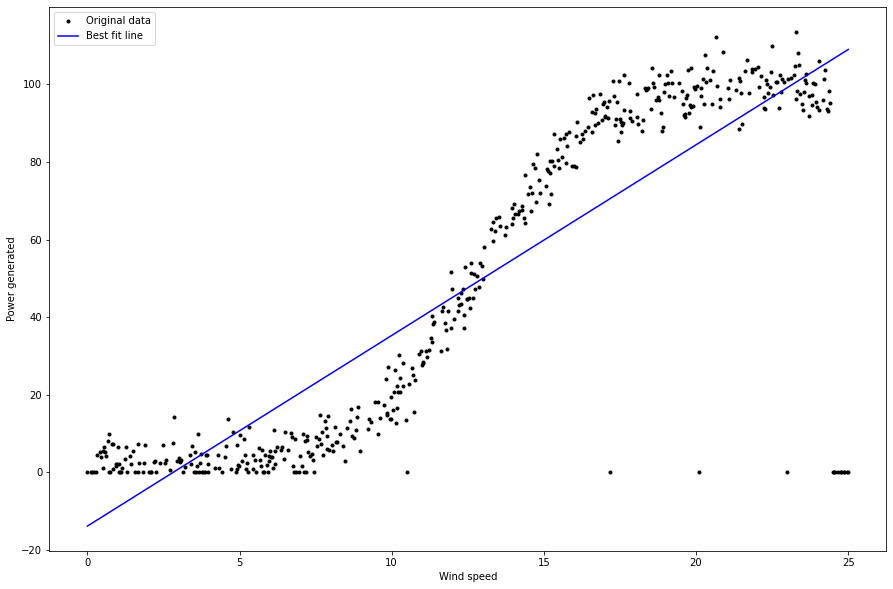

In [7]:
#then using these values, we plot the line on top of our data now
plt.rcParams['figure.figsize']=([15, 10])

plt.plot(power, speed, 'k.', label='Original data')
plt.plot(power, 4.91759567 * power + -13.89990263, 'b-', label='Best fit line')

# Add axis labels and a legend.
plt.xlabel('Wind speed')
plt.ylabel('Power generated')
plt.legend()

# Show the plot.
plt.show()

<br>

Having used numpy polyfit function to find the best line to fit the data. We are aware that data do not fit perfectly on this line, which means that the cost is greater than 0. We can use the **coefficient of determination** ( also known as **R-squared** value how much variance in *y* is determine by *x*. In this case how much the power generated depens on the speed of the wind for our turbine. the coefficient of determination can be calculated using the formula below: 

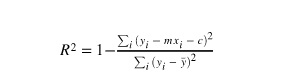

Let's calculate this value for our dataset using this formula with the cost values returned from  np.polyfit :4.91759567, -13.89990263 and our variables. 


In [8]:
#calculating R-squared value using formula from cell above: 

#first I calculated the averages of power but I am using np.corrcoef function which performs same action as the function for R2.
Pearsoncoef=np.corrcoef(speed,power)[0][1]**2


print("The Pearson's coefficient value is :",Pearsoncoef)


#np.corrcoef calculates Pearsons correlation coeficcient , in order to turn it into R-squared we just need to square this value

Rsquared= (Pearsoncoef)**2

print("The R-squared value is:",Rsquared)

The Pearson's coefficient value is : 0.7289360258564074
The R-squared value is: 0.531347729791333


<br>

Taking into account the results above, it seems that there is a relationship between the values of x-axis(speed) and y-axis(power) so we can use linear regression to make predictions. However relationship seems to be a little bit weak. 
As 1 means 100% related while we got R-squared value of 0.531. 


<br>

### Polynomial Linear Regression

Having a look into the best line fit , as suggested before, I see that my data is correlated but the relationship is not linear. Taking this into account I am going to use a different linear regression which is the **Polynomial Linear Regression** and comment the results. 

First we need to detail what is polynomial linear regression. 
Polynomial regression, has in common with linear regression that it also uses the relationship betwen the variables *x* and *y*
to find the best way to draw a line between data points, but this line does not need to be straight. 

This type of linear regression has some advantages that might be usedul for this dataset analysis and prediction, such as :
- It has a broad range of functions that can be a fit under it 
- It fits a wide range of curvature [source](https://towardsdatascience.com/introduction-to-linear-regression-and-polynomial-regression-f8adc96f31cb)

Some inconvenientes might also arise: 

- The presence of outliers can affect very hard the results
- There are in general fewer model validation tools for the detection of outliers in this type of regression than for simple linear. 



<br>

#### Applying this type of regression to our dataset:

For this section I am going to use another of the Python methods for polynomial regression. 
Using the function **numpy poly1d** , we make easier to define a polynomial function. Lets see example below with our dataset and in addition to **numpy polyfit**. 


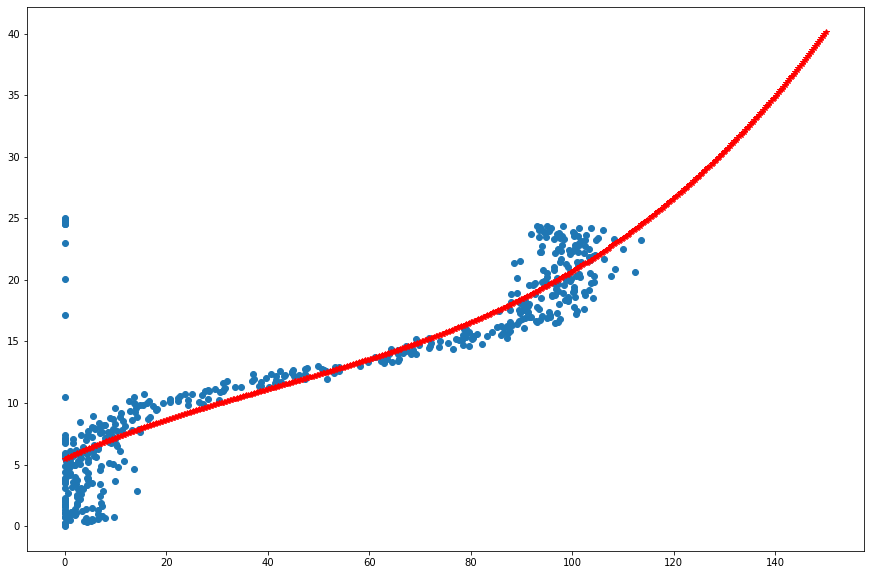

In [9]:
#Applying these functions to our data to create a polynomial linear regression curve

Polynom=np.poly1d(np.polyfit(speed, power,deg=3))

xline=np.linspace(0.0, 150, 500)

#plotting these elements woth a scatter plot

#resizing
plt.rcParams['figure.figsize']=([15, 10])

plt.scatter( speed, power)
plt.plot(xline, Polynom(xline), 'r*')

plt.show()


<br>

#### Calculating R-Squared for polynomial regression: 

Now I am going to calculate the R-squared value as I did in the rpevious section to determine if this type of regression can maybe be used to make predictions for this dataset. I am following the method shown in this [source](https://www.w3schools.com/python/python_ml_polynomial_regression.asp), using **Sklearn** module for this calculation. 


In [11]:
#Using sklearn.metrics to find R-squared value: 

#first, I import sklearn and specific module

from sklearn.metrics import r2_score

r2=r2_score(power,Polynom(speed) )

print('The R-squared value is: ',r2)


The R-squared value is:  0.7326528833699152


<br>

If we compare this R-squared value using polynomial regression can see that it fits better than simple linear regression which 
R-squared only reached 0.531347729791333. 
Now assuming that this regression type is more suitable to make predictions for this dataset, I am going to try to predict values using **Sklearn**. See  the process in code cells below: 



In [12]:
#Let's predict what would be the power generated if wind speed is: 140mph 

Power_generated = Polynom(140)

print('This is the amount of power generated considering win speed is 140mph:')
print(Power_generated)


This is the amount of power generated considering win speed is 140mph:
34.91660019970294


<br>

Trying stats models as seen in this [lecture jupyter notebook](https://github.com/ianmcloughlin/jupyter-teaching-notebooks/blob/master/regression.ipynb)



In [13]:
#importing sklearn module for stats model

import statsmodels.api as sm

# Tell statmodels to include an intercept.
xwithc = sm.add_constant(speed)

# Create a model.
msm = sm.OLS(power, xwithc)
# Fit the data.
rsm = msm.fit()
# Print a summary.
print(rsm.summary())

                            OLS Regression Results                            
Dep. Variable:                  speed   R-squared:                       0.729
Model:                            OLS   Adj. R-squared:                  0.728
Method:                 Least Squares   F-statistic:                     1339.
Date:                Sat, 26 Dec 2020   Prob (F-statistic):          2.86e-143
Time:                        12:49:16   Log-Likelihood:                -1371.4
No. Observations:                 500   AIC:                             2747.
Df Residuals:                     498   BIC:                             2755.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          5.4732      0.257     21.275      0.0

<br>

#### Predictions made using Machine learning approaches

Following the lecturer's [lesson](https://github.com/ianmcloughlin/jupyter-teaching-notebooks/blob/master/simple-linear-regression.ipynb) here, I am using **Sklearn.neural_network** to predict power generated based on wind speeds included in our dataset.**Sklearn.neural_network** uses a supervised learning algorithm called **Multi-later Perceptron**, which learns a function 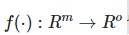 by training on a dataset, where 'm' is the number of dimensions for input and 'o' is the amount of dimensions for output [source](https://scikit-learn.org/stable/modules/neural_networks_supervised.html).

This module can learn a non-linear function approximation for any classification or regression. Let's see how to do so below in code cells.

In [14]:
#Using sklearn.neural_network

#First, importing necessary module

import sklearn.neural_network as sknn

speed2d=speed.values.reshape(-1,1)#using this command to reshape speed values to 2d array as needed

# Training the neural network.
regr = sknn.MLPRegressor(max_iter=10000).fit(speed2d,power)

# Show the predictions.
np.array([power, regr.predict(speed2d)]).T

array([[ 0.        ,  8.05664135],
       [ 0.125     ,  8.05664135],
       [ 0.15      ,  8.05664135],
       [ 0.225     ,  8.05664135],
       [ 0.275     ,  8.05664135],
       [ 0.325     ,  5.38480624],
       [ 0.4       ,  5.52008417],
       [ 0.45      ,  5.30490524],
       [ 0.501     ,  4.89273328],
       [ 0.526     ,  5.57815084],
       [ 0.551     ,  5.72766856],
       [ 0.576     ,  5.52878626],
       [ 0.626     ,  5.36724384],
       [ 0.676     ,  5.961201  ],
       [ 0.701     ,  6.2415665 ],
       [ 0.726     ,  8.05664135],
       [ 0.751     ,  8.05664135],
       [ 0.801     ,  5.84997247],
       [ 0.826     ,  5.1336671 ],
       [ 0.851     ,  5.86247184],
       [ 0.926     ,  4.96401354],
       [ 0.951     ,  4.88941568],
       [ 0.976     ,  4.9772478 ],
       [ 1.001     ,  5.72972542],
       [ 1.026     ,  8.05664135],
       [ 1.051     ,  4.98133485],
       [ 1.076     ,  8.05664135],
       [ 1.101     ,  7.61395249],
       [ 1.151     ,

<br>

As a result of applying this **Sklearn module** we can see a relation between input values (wind speed) and the power outupts after 10000 iterations. 

In [15]:
#in order to calculate how accurate these predictions are, the method has this functionality

regr.score(speed2d,power)

0.754826346753798

<br>

We can see that the fit is moderate to good as it is close to 1, so the predictions are pretty accurate. 

<br> 

### Prediction model as polynomial

For this section of the project I am going to use Keras to create my own neural network and carry on prediction of power output using wind speed inputs. This section is most likely going to the Machine learning project but I am starting it here since I have all data in this notebook. 

#### What is Keras for Machine learning?

Keras for machine learning is [source](https://keras.io/getting_started/intro_to_keras_for_engineers/)
Also using [lecturer's video](https://web.microsoftstream.com/video/8ceee222-ebdf-4234-b05b-9090155f1747)and [Jupyter notebook](https://github.com/ianmcloughlin/jupyter-teaching-notebooks/blob/master/keras-linear.ipynb).

In [ ]:



#Now using dataset I am creating a new neural network with two neurons ( one for wind
#speed the other for Power generated )

# using this tutorial: https://machinelearningmastery.com/tutorial-first-neural-network-python-keras/


# Neural networks.
import tensorflow.keras as kr

# Numerical arrays
import numpy as np

# Data frames.
import pandas as pd

# Plotting
import matplotlib.pyplot as plt


In [ ]:


# Plot style.
plt.style.use("ggplot")

# Plot size.
plt.rcParams['figure.figsize'] = [14, 18]


In [ ]:
#loading dataset
Powerdataset=pd.read_csv('Powerproduction dataset.csv', delimiter=',')


x=Powerdataset['speed']
y=Powerdataset['power']

In [ ]:
#As this dataset fits better a polynomial regression I am trying this approach

f = lambda x: 2.0 * x**2 + 3.0 * x + 4.0

poly = pd.DataFrame()
poly['x'] = Powerdataset['speed']
poly['y'] = poly['x'].apply(f)

In [ ]:
# Creating model using sequential
model = kr.models.Sequential()
model.add(kr.layers.Dense(50, input_shape=(1,), activation='sigmoid', kernel_initializer="glorot_uniform", bias_initializer="glorot_uniform"))
model.add(kr.layers.Dense(1, activation='linear', kernel_initializer="glorot_uniform", bias_initializer="glorot_uniform"))
model.compile(kr.optimizers.Adam(lr=0.001), loss='mean_squared_error')#Adjusting learn rate  to 0.001 for more accuracy

In [26]:

# Fit the data.
model.fit(poly['x'], poly['y'], epochs=1000, batch_size=10) # batch_size chooses how many values are going to be send to add the weights


Epoch 1/1000
50/50 [==============================] - 0s 816us/step - loss: 35.7633
Epoch 2/1000
50/50 [==============================] - 0s 794us/step - loss: 35.5566
Epoch 3/1000
50/50 [==============================] - 0s 816us/step - loss: 34.4393
Epoch 4/1000
50/50 [==============================] - 0s 816us/step - loss: 32.5464
Epoch 5/1000
50/50 [==============================] - 0s 816us/step - loss: 33.9927
Epoch 6/1000
50/50 [==============================] - 0s 816us/step - loss: 32.5637
Epoch 7/1000
50/50 [==============================] - 0s 816us/step - loss: 33.8795
Epoch 8/1000
50/50 [==============================] - 0s 653us/step - loss: 32.9482
Epoch 9/1000
50/50 [==============================] - 0s 816us/step - loss: 33.4193
Epoch 10/1000
50/50 [==============================] - 0s 816us/step - loss: 34.1697
Epoch 11/1000
50/50 [==============================] - 0s 653us/step - loss: 33.6316
Epoch 12/1000
50/50 [==============================] - 0s 665us/step - los

50/50 [==============================] - 0s 653us/step - loss: 13.3824
Epoch 193/1000
50/50 [==============================] - 0s 816us/step - loss: 12.1431
Epoch 194/1000
50/50 [==============================] - 0s 816us/step - loss: 11.5573
Epoch 195/1000
50/50 [==============================] - 0s 653us/step - loss: 15.2153
Epoch 196/1000
50/50 [==============================] - 0s 816us/step - loss: 11.1564
Epoch 197/1000
50/50 [==============================] - 0s 816us/step - loss: 11.9495
Epoch 198/1000
50/50 [==============================] - 0s 653us/step - loss: 11.6220
Epoch 199/1000
50/50 [==============================] - 0s 980us/step - loss: 11.8386
Epoch 200/1000
50/50 [==============================] - 0s 1ms/step - loss: 11.9221
Epoch 201/1000
50/50 [==============================] - 0s 816us/step - loss: 12.2599
Epoch 202/1000
50/50 [==============================] - 0s 816us/step - loss: 11.3393
Epoch 203/1000
50/50 [==============================] - 0s 653us/step -

50/50 [==============================] - 0s 816us/step - loss: 9.7010
Epoch 289/1000
50/50 [==============================] - 0s 653us/step - loss: 7.4905
Epoch 290/1000
50/50 [==============================] - 0s 653us/step - loss: 8.3208
Epoch 291/1000
50/50 [==============================] - 0s 653us/step - loss: 8.4675
Epoch 292/1000
50/50 [==============================] - 0s 653us/step - loss: 8.2009
Epoch 293/1000
50/50 [==============================] - 0s 816us/step - loss: 8.0287
Epoch 294/1000
50/50 [==============================] - 0s 816us/step - loss: 7.5988
Epoch 295/1000
50/50 [==============================] - 0s 816us/step - loss: 7.8509
Epoch 296/1000
50/50 [==============================] - 0s 816us/step - loss: 7.7812
Epoch 297/1000
50/50 [==============================] - 0s 816us/step - loss: 6.9657
Epoch 298/1000
50/50 [==============================] - 0s 653us/step - loss: 7.0543
Epoch 299/1000
50/50 [==============================] - 0s 653us/step - loss: 7.

50/50 [==============================] - 0s 816us/step - loss: 4.4052
Epoch 481/1000
50/50 [==============================] - 0s 816us/step - loss: 4.5474
Epoch 482/1000
50/50 [==============================] - 0s 653us/step - loss: 5.5913
Epoch 483/1000
50/50 [==============================] - 0s 816us/step - loss: 6.2105
Epoch 484/1000
50/50 [==============================] - 0s 653us/step - loss: 3.9829
Epoch 485/1000
50/50 [==============================] - 0s 653us/step - loss: 3.8565
Epoch 486/1000
50/50 [==============================] - 0s 816us/step - loss: 3.6919
Epoch 487/1000
50/50 [==============================] - 0s 653us/step - loss: 4.8023
Epoch 488/1000
50/50 [==============================] - 0s 653us/step - loss: 4.6048
Epoch 489/1000
50/50 [==============================] - 0s 816us/step - loss: 3.8472
Epoch 490/1000
50/50 [==============================] - 0s 653us/step - loss: 3.9624
Epoch 491/1000
50/50 [==============================] - 0s 653us/step - loss: 3.

Epoch 576/1000
50/50 [==============================] - 0s 653us/step - loss: 4.1581
Epoch 577/1000
50/50 [==============================] - 0s 979us/step - loss: 3.3208
Epoch 578/1000
50/50 [==============================] - 0s 653us/step - loss: 2.9100
Epoch 579/1000
50/50 [==============================] - 0s 816us/step - loss: 3.7269
Epoch 580/1000
50/50 [==============================] - 0s 653us/step - loss: 3.3615
Epoch 581/1000
50/50 [==============================] - 0s 653us/step - loss: 2.9786
Epoch 582/1000
50/50 [==============================] - 0s 816us/step - loss: 3.7106
Epoch 583/1000
50/50 [==============================] - 0s 816us/step - loss: 3.1302
Epoch 584/1000
50/50 [==============================] - 0s 653us/step - loss: 2.7792
Epoch 585/1000
50/50 [==============================] - 0s 653us/step - loss: 3.0663
Epoch 586/1000
50/50 [==============================] - 0s 816us/step - loss: 3.1882
Epoch 587/1000
50/50 [==============================] - 0s 816us/

50/50 [==============================] - 0s 653us/step - loss: 2.1414
Epoch 769/1000
50/50 [==============================] - 0s 816us/step - loss: 2.1175
Epoch 770/1000
50/50 [==============================] - 0s 816us/step - loss: 2.4608
Epoch 771/1000
50/50 [==============================] - 0s 653us/step - loss: 2.4177
Epoch 772/1000
50/50 [==============================] - 0s 653us/step - loss: 2.7082
Epoch 773/1000
50/50 [==============================] - 0s 816us/step - loss: 1.6860
Epoch 774/1000
50/50 [==============================] - 0s 816us/step - loss: 1.9602
Epoch 775/1000
50/50 [==============================] - 0s 816us/step - loss: 2.3783
Epoch 776/1000
50/50 [==============================] - 0s 653us/step - loss: 1.6757
Epoch 777/1000
50/50 [==============================] - 0s 653us/step - loss: 2.2208
Epoch 778/1000
50/50 [==============================] - 0s 816us/step - loss: 2.0069
Epoch 779/1000
50/50 [==============================] - 0s 816us/step - loss: 5.

Epoch 864/1000
50/50 [==============================] - 0s 653us/step - loss: 2.3980
Epoch 865/1000
50/50 [==============================] - 0s 816us/step - loss: 2.0762
Epoch 866/1000
50/50 [==============================] - 0s 653us/step - loss: 1.6039
Epoch 867/1000
50/50 [==============================] - 0s 653us/step - loss: 1.6668
Epoch 868/1000
50/50 [==============================] - 0s 816us/step - loss: 1.3223
Epoch 869/1000
50/50 [==============================] - 0s 816us/step - loss: 1.5387
Epoch 870/1000
50/50 [==============================] - 0s 653us/step - loss: 1.5083
Epoch 871/1000
50/50 [==============================] - 0s 653us/step - loss: 2.4548
Epoch 872/1000
50/50 [==============================] - 0s 653us/step - loss: 1.4965
Epoch 873/1000
50/50 [==============================] - 0s 653us/step - loss: 2.3268
Epoch 874/1000
50/50 [==============================] - 0s 816us/step - loss: 1.6709
Epoch 875/1000
50/50 [==============================] - 0s 653us/

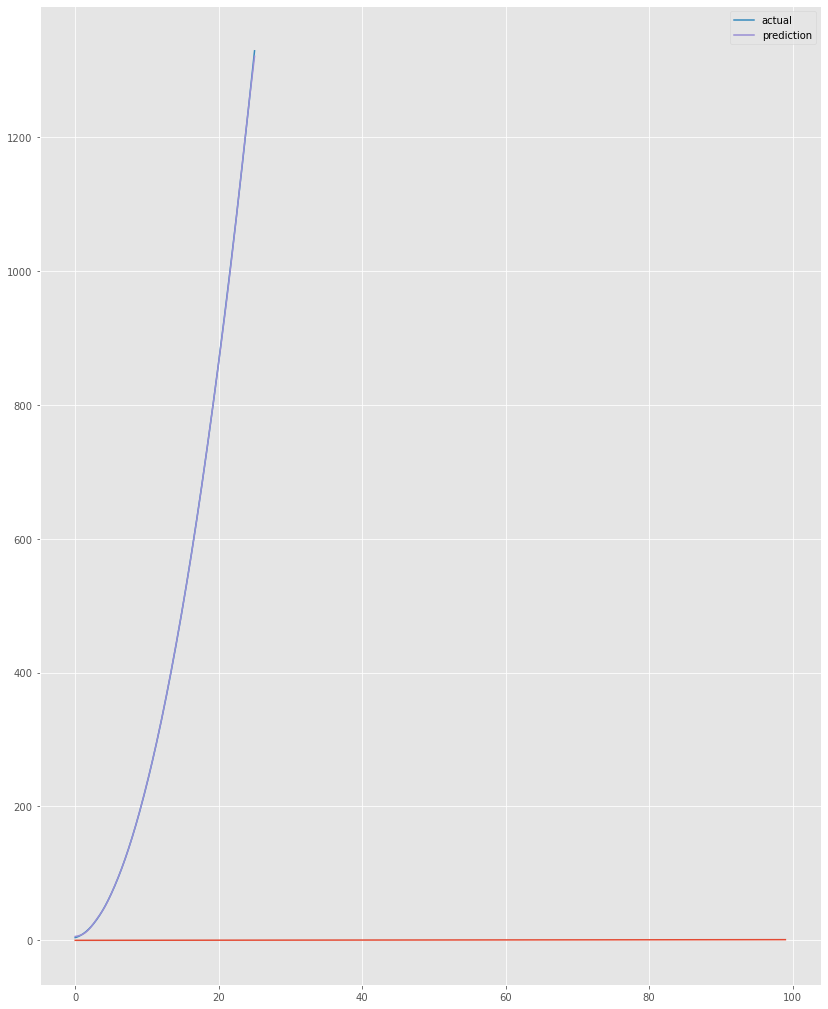

In [27]:
#Now we plot the result showing in red for actual and blue for the prediction obtained

xline=np.linspace(0.00,1,100)

plt.plot(xline)
plt.plot(poly['x'], poly['y'], label='actual')
plt.plot(poly['x'], model.predict(poly['x']), label='prediction')
plt.legend();

Now we evaluate if this model is working as intended to predict the 'y' values. 

In [23]:
#we can take a sample of values and see the predictions

model.predict([1.0,2.0,3.0,4.0])



array([[12.5646  ],
       [16.4786  ],
       [30.160646],
       [49.273712]], dtype=float32)

In [24]:
# See what f says they are.
np.array([[f(i)] for i in [1.0, 2.0, 3.0, 4.0]])


array([[ 9.],
       [18.],
       [31.],
       [48.]])

<br>

Observing the values generated by my model above, I can see that the model is very much off. I need to readjust everything and try to makle more exact. 

<br>

### Trying different approach with dataset


This model does not look right for this dataset. Trying different approach using this [tutorial](https://stackabuse.com/tensorflow-2-0-solving-classification-and-regression-problems/) in classification and regression using Keras as inspiration

In [28]:
#loading dataset
Powerdataset=pd.read_csv('Powerproduction dataset.csv', delimiter=',')


x=Powerdataset['speed']
y=Powerdataset['power']

#print(y)

0      0.0
1      0.0
2      0.0
3      0.0
4      0.0
      ... 
495    0.0
496    0.0
497    0.0
498    0.0
499    0.0
Name: power, Length: 500, dtype: float64


In [69]:
#Showing first rows of dataset:

Powerdataset.head()


,speed,power
0,0.000,0.0
1,0.125,0.0
2,0.150,0.0
3,0.225,0.0
4,0.275,0.0


In [70]:
#now starting model training with sklearn and tensorflow

#Importing sklearn model selection to divide dataset into training and test sets

from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.20, random_state=0)




In [71]:
#Importing tensorflow classes to train the model

from tensorflow.keras.layers import Input, Dense, Activation,Dropout
from tensorflow.keras.models import Model

In [72]:
#Creating model

model = kr.models.Sequential()
model.add(kr.layers.Dense(2, input_shape=(1,), activation='sigmoid', kernel_initializer="glorot_uniform", bias_initializer="glorot_uniform"))
model.add(kr.layers.Dense(1, activation='linear', kernel_initializer="glorot_uniform", bias_initializer="glorot_uniform"))
model.compile(kr.optimizers.Adam(lr=0.001), loss='mean_squared_error')#Adjusting learn rate  to 0.001 for more accuracy

In [73]:
#Now we train the model

history = model.fit(x_train, y_train, batch_size=10, epochs=500, verbose=1, validation_split=0.2)

Epoch 1/500
32/32 [==============================] - 1s 7ms/step - loss: 3900.7434 - val_loss: 4234.2188
Epoch 2/500
32/32 [==============================] - 0s 3ms/step - loss: 3957.3002 - val_loss: 4224.8760
Epoch 3/500
32/32 [==============================] - 0s 3ms/step - loss: 4144.2163 - val_loss: 4215.5459
Epoch 4/500
32/32 [==============================] - 0s 3ms/step - loss: 4075.0714 - val_loss: 4206.2944
Epoch 5/500
32/32 [==============================] - 0s 3ms/step - loss: 4674.1546 - val_loss: 4197.1182
Epoch 6/500
32/32 [==============================] - 0s 3ms/step - loss: 4348.1815 - val_loss: 4188.0933
Epoch 7/500
32/32 [==============================] - 0s 3ms/step - loss: 4029.4792 - val_loss: 4179.0967
Epoch 8/500
32/32 [==============================] - 0s 3ms/step - loss: 4082.5054 - val_loss: 4169.9868
Epoch 9/500
32/32 [==============================] - 0s 3ms/step - loss: 3814.9315 - val_loss: 4160.9653
Epoch 10/500
32/32 [==============================] - 0

Epoch 155/500
32/32 [==============================] - 0s 3ms/step - loss: 2811.3839 - val_loss: 3041.5933
Epoch 156/500
32/32 [==============================] - 0s 2ms/step - loss: 2895.9867 - val_loss: 3034.9475
Epoch 157/500
32/32 [==============================] - 0s 2ms/step - loss: 3159.6122 - val_loss: 3028.1140
Epoch 158/500
32/32 [==============================] - 0s 2ms/step - loss: 2756.6413 - val_loss: 3021.6970
Epoch 159/500
32/32 [==============================] - 0s 2ms/step - loss: 2858.7658 - val_loss: 3014.9529
Epoch 160/500
32/32 [==============================] - 0s 2ms/step - loss: 2976.4361 - val_loss: 3008.1560
Epoch 161/500
32/32 [==============================] - 0s 2ms/step - loss: 2468.4249 - val_loss: 3001.8030
Epoch 162/500
32/32 [==============================] - 0s 2ms/step - loss: 2694.5558 - val_loss: 2995.1335
Epoch 163/500
32/32 [==============================] - 0s 2ms/step - loss: 2759.8850 - val_loss: 2988.4680
Epoch 164/500
32/32 [================

32/32 [==============================] - 0s 2ms/step - loss: 2222.3364 - val_loss: 2139.7544
Epoch 308/500
32/32 [==============================] - 0s 2ms/step - loss: 1779.3912 - val_loss: 2134.8032
Epoch 309/500
32/32 [==============================] - 0s 2ms/step - loss: 1986.6899 - val_loss: 2129.5813
Epoch 310/500
32/32 [==============================] - 0s 2ms/step - loss: 2154.0297 - val_loss: 2124.3472
Epoch 311/500
32/32 [==============================] - 0s 2ms/step - loss: 2046.7137 - val_loss: 2119.0828
Epoch 312/500
32/32 [==============================] - 0s 2ms/step - loss: 1923.2826 - val_loss: 2114.1860
Epoch 313/500
32/32 [==============================] - 0s 2ms/step - loss: 1893.9015 - val_loss: 2108.9873
Epoch 314/500
32/32 [==============================] - 0s 2ms/step - loss: 2048.2002 - val_loss: 2103.6760
Epoch 315/500
32/32 [==============================] - 0s 2ms/step - loss: 2163.9551 - val_loss: 2098.5710
Epoch 316/500
32/32 [==============================

32/32 [==============================] - 0s 2ms/step - loss: 1442.3475 - val_loss: 1457.4327
Epoch 460/500
32/32 [==============================] - 0s 2ms/step - loss: 1340.8149 - val_loss: 1453.7253
Epoch 461/500
32/32 [==============================] - 0s 2ms/step - loss: 1404.1837 - val_loss: 1449.7849
Epoch 462/500
32/32 [==============================] - 0s 2ms/step - loss: 1345.1875 - val_loss: 1446.2067
Epoch 463/500
32/32 [==============================] - 0s 2ms/step - loss: 1400.0227 - val_loss: 1442.1971
Epoch 464/500
32/32 [==============================] - 0s 2ms/step - loss: 1390.3576 - val_loss: 1438.5233
Epoch 465/500
32/32 [==============================] - 0s 2ms/step - loss: 1445.7101 - val_loss: 1434.6819
Epoch 466/500
32/32 [==============================] - 0s 2ms/step - loss: 1236.3222 - val_loss: 1431.1029
Epoch 467/500
32/32 [==============================] - 0s 2ms/step - loss: 1415.4022 - val_loss: 1427.1328
Epoch 468/500
32/32 [==============================

In [64]:
#Printing model

Model: "model_2"

print(Model)

<class 'tensorflow.python.keras.engine.training.Model'>


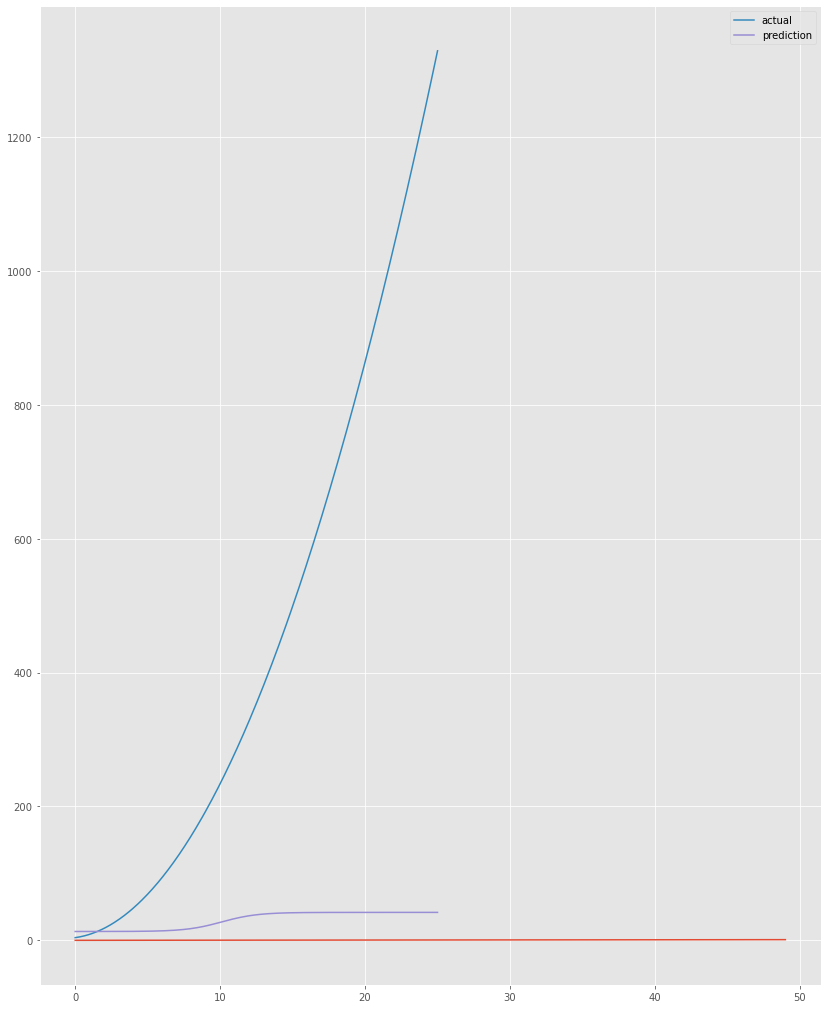

In [74]:
#plotting results


xline=np.linspace(0.0,1,50)

plt.plot(xline)
plt.plot(poly['x'], poly['y'], label='actual')
plt.plot(poly['x'], model.predict(poly['x']), label='prediction')

plt.legend()

In [45]:
#Evaluating the performance of a regression model on test set using 
#root mean squared error method

from sklearn.metrics import mean_squared_error
from math import sqrt

pred_train = model.predict(x_train)
print(np.sqrt(mean_squared_error(y_train,pred_train)))

pred = model.predict(x_test)
print(np.sqrt(mean_squared_error(y_test,pred)))

14.226508639458526
22.161640647919437


<br>

### Conclusion

Looking at the shape that the prediction is creating it seems that this prediction model is more accurate.

However according to the cell directly above we can observe that using root mean squared error method show us that the train model is performing better than the test model, although there is no much difference between the two values, our model seems to be overfitting. 

<br> 

#### Underfitting and Overfitting in polynomial regression

using [this](https://realpython.com/linear-regression-in-python/#simple-linear-regression)information for this section. 


####

In [ ]:
#